In [1]:
import backtest
import backtest_futures
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
DATA_PATH = "./data/"
dat = pd.read_parquet(DATA_PATH + "eurusd.parquet")
dat.shape, dat.columns

((661062, 3), Index(['time', 'close', 'volume'], dtype='object'))

In [3]:
opt_trades = {}
dd_constraints = np.arange(10,100,10)
for dd_bps in dd_constraints:
    opt_trades[dd_bps] = backtest.target_optimal(
        df_price = dat.close,
        fee_bps = 3,
        dd_bps = dd_bps
    )
    
    print(f"Done optimizing labels with dd_bps constraint = {dd_bps}.")

Done optimizing labels with dd_bps constraint = 10.
Done optimizing labels with dd_bps constraint = 20.
Done optimizing labels with dd_bps constraint = 30.
Done optimizing labels with dd_bps constraint = 40.
Done optimizing labels with dd_bps constraint = 50.
Done optimizing labels with dd_bps constraint = 60.
Done optimizing labels with dd_bps constraint = 70.
Done optimizing labels with dd_bps constraint = 80.
Done optimizing labels with dd_bps constraint = 90.


In [4]:
stats = {} # trading statistics
for dd_bps in dd_constraints:
    trades_in = dat.copy()
    trades_in['S'] = 0
    trades_in['L'] = 0
    trades_in['C'] = 0
    trades_in.loc[opt_trades[dd_bps] == 0, 'S'] = 1
    trades_in.loc[opt_trades[dd_bps] == 1, 'L'] = 1
    trades_in.loc[opt_trades[dd_bps] == 2, 'C'] = 1
    
    b = backtest.BackTest(data = trades_in,
                          decimal_pip = 5,
                          threshold = 0.5,
                          fee_bps = 3)
    stats[dd_bps] = b.trade_stats()

In [5]:
stats[dd_bps]

{'annual_return': 1.513,
 'sharpe': 15.48,
 'sortino': 29.06,
 'std_deviation': 0.098,
 'total_return': 26.7109,
 'trade_count_long': 724,
 'trade_count_short': 699,
 'trade_count_total': 1423,
 'average_return_long': 185.0,
 'average_return_short': 191.0,
 'accuracy_long': 1.0,
 'accuracy_short': 1.0,
 'accuracy_total': 1.0,
 'max_drawdown': -0.011,
 'max_drawdown_days': 3}

<Axes: xlabel='dd_bps', ylabel='annual_return'>

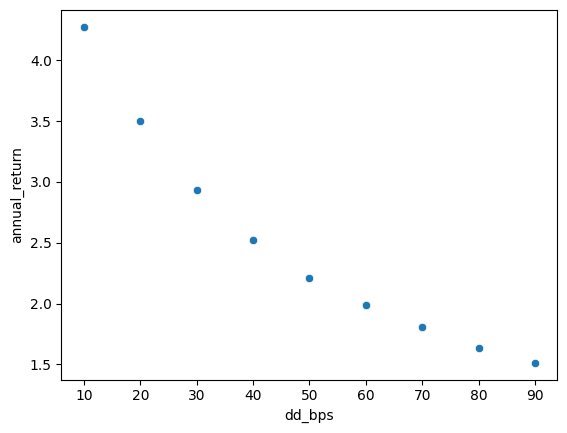

In [6]:
df_stats = pd.DataFrame.from_dict(stats, orient = 'index')
df_stats['dd_bps'] = df_stats.index
sb.scatterplot(data = df_stats,
               x = 'dd_bps',
               y = 'annual_return')

<Axes: xlabel='dd_bps', ylabel='sortino'>

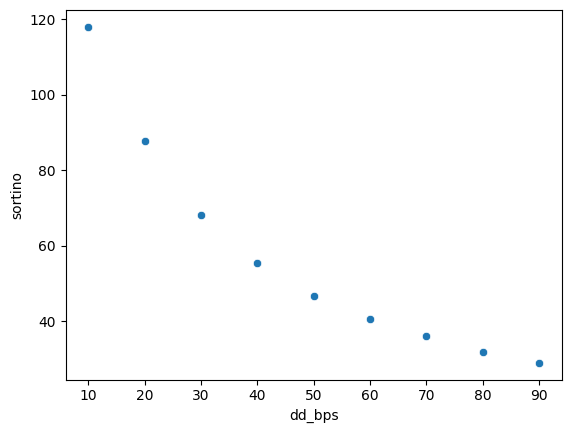

In [7]:
sb.scatterplot(data = df_stats,
               x = 'dd_bps',
               y = 'sortino')

<Axes: xlabel='dd_bps', ylabel='trade_count_total'>

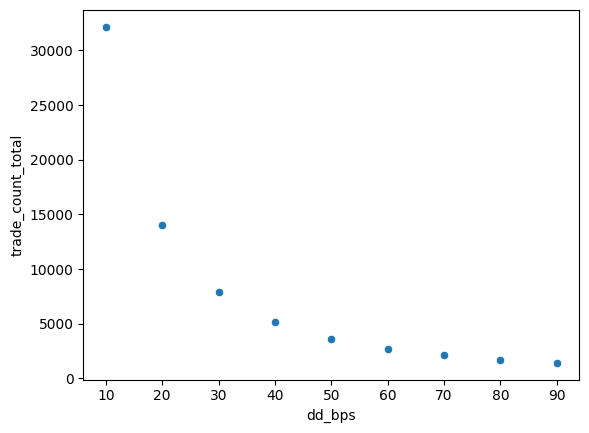

In [8]:
sb.scatterplot(data = df_stats,
               x = 'dd_bps',
               y = 'trade_count_total')

<Axes: xlabel='dd_bps', ylabel='max_drawdown'>

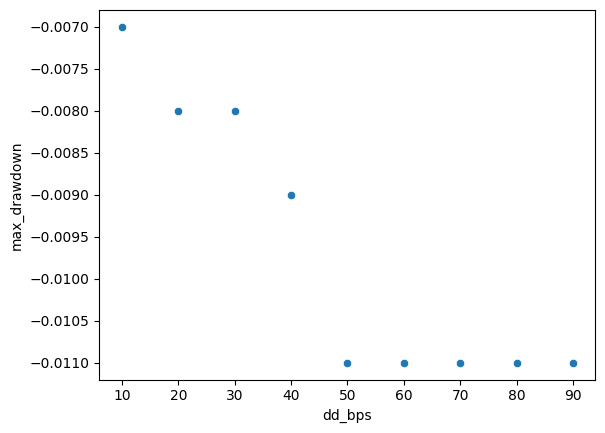

In [9]:
sb.scatterplot(data = df_stats,
               x = 'dd_bps',
               y = 'max_drawdown')

Illustration of backtest_futures module.

In [10]:
DATA_PATH = "./data/"
dat = pd.read_parquet(DATA_PATH + "es.parquet")

opt_trades = {}
dd_constraints = np.arange(10, 100, 10)
for dd_bps in dd_constraints:
    opt_trades[dd_bps] = backtest_futures.target_optimal(
        df_price = dat.close,
        min_increment = 0.25,
        fee = 0.50,
        dd_bps = dd_bps
    )
    
    print(f"Done optimizing labels with dd_bps constraint = {dd_bps}.")

Done optimizing labels with dd_bps constraint = 10.
Done optimizing labels with dd_bps constraint = 20.
Done optimizing labels with dd_bps constraint = 30.
Done optimizing labels with dd_bps constraint = 40.
Done optimizing labels with dd_bps constraint = 50.
Done optimizing labels with dd_bps constraint = 60.
Done optimizing labels with dd_bps constraint = 70.
Done optimizing labels with dd_bps constraint = 80.
Done optimizing labels with dd_bps constraint = 90.


In [11]:
stats = {} # trading statistics
for dd_bps in dd_constraints:
    trades_in = dat.copy()
    trades_in['S'] = 0
    trades_in['L'] = 0
    trades_in['C'] = 0
    trades_in.loc[opt_trades[dd_bps] == 0, 'S'] = 1
    trades_in.loc[opt_trades[dd_bps] == 1, 'L'] = 1
    trades_in.loc[opt_trades[dd_bps] == 2, 'C'] = 1
    
    b = backtest_futures.BackTest(
        data = trades_in,
        min_increment = 0.25,
        threshold = 0.5,
        fee = 0.50
    )
    stats[dd_bps] = b.trade_stats()

In [12]:
stats[10]

{'annual_return': 14.743,
 'sharpe': 101.92,
 'sortino': 235.28,
 'std_deviation': 0.145,
 'total_return': 8.5058,
 'trade_count_long': 1885,
 'trade_count_short': 1851,
 'trade_count_total': 3736,
 'average_return_long': 0.0023,
 'average_return_short': 0.0023,
 'accuracy_long': 0.982,
 'accuracy_short': 0.994,
 'accuracy_total': 0.988,
 'max_drawdown': -0.005,
 'max_drawdown_days': 0}

In [13]:
stats[90]

{'annual_return': 4.198,
 'sharpe': 27.12,
 'sortino': 48.7,
 'std_deviation': 0.155,
 'total_return': 2.4218,
 'trade_count_long': 64,
 'trade_count_short': 66,
 'trade_count_total': 130,
 'average_return_long': 0.0189,
 'average_return_short': 0.0184,
 'accuracy_long': 1.0,
 'accuracy_short': 1.0,
 'accuracy_total': 1.0,
 'max_drawdown': -0.009,
 'max_drawdown_days': 0}

<Axes: xlabel='dd_bps', ylabel='sortino'>

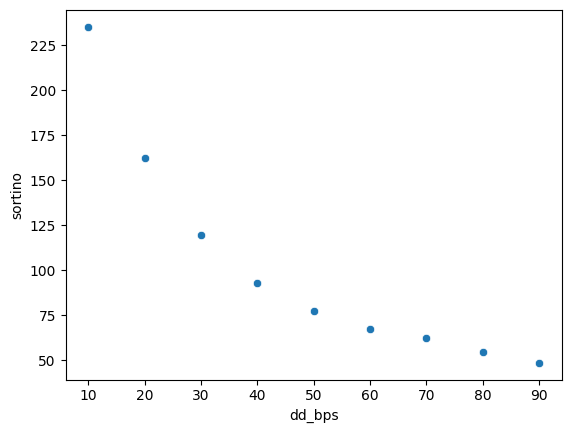

In [14]:
df_stats = pd.DataFrame.from_dict(stats, orient = 'index')
df_stats['dd_bps'] = df_stats.index
sb.scatterplot(data = df_stats,
               x = 'dd_bps',
               y = 'sortino')